In [3]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

In [4]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [5]:
# drop id, timestamp and country columns
data = data.drop(columns=['id', 'timestamp','country'])

In [6]:
# replace NANs in hours_per_week with median value of the column  
data.loc[data['hours_per_week'].isna(), 'hours_per_week'] = data['hours_per_week'].median()
data.loc[data['telecommute_days_per_week'].isna(), 'telecommute_days_per_week'] = data['telecommute_days_per_week'].median()

#Handling null values in categorical columns
data = data.dropna()

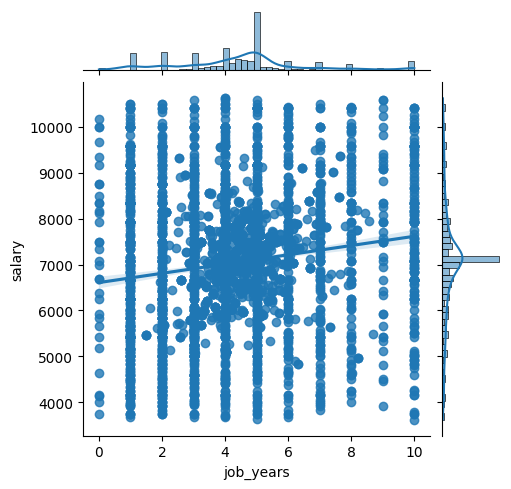

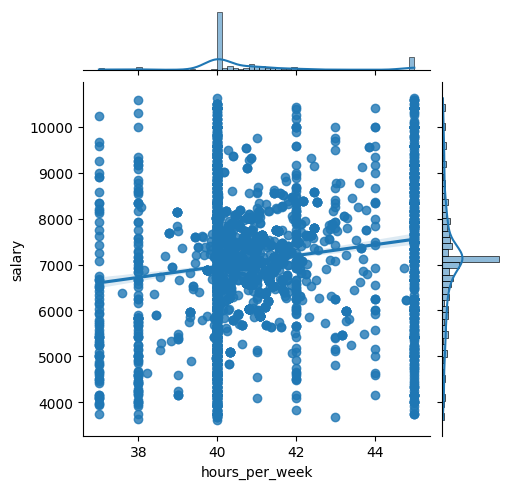

In [7]:
# joint plots for numeric variables

cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.jointplot(x=c, y="salary", data=data, kind = 'reg', height = 5)
plt.show()

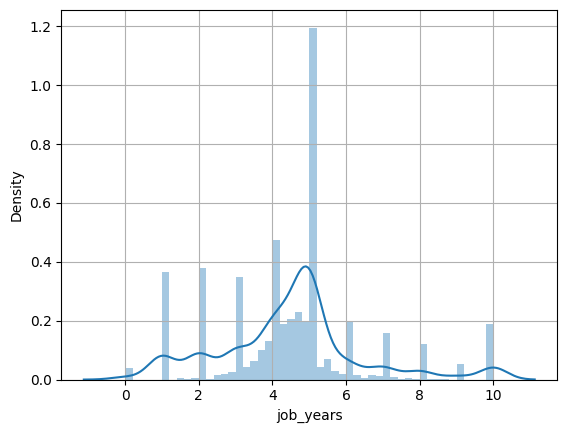

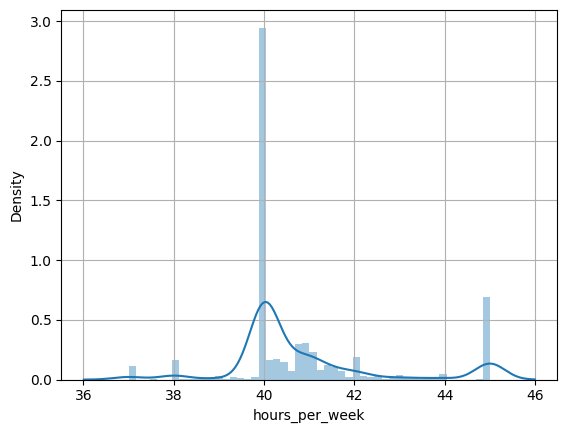

In [8]:
cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.distplot(data[c])
    plt.grid()
    plt.show()

In [9]:
# create another copy of dataset and append encoded features to it
data_train = data.copy()
data_train.head()

# select categorical features
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object' 
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
cat_cols

['employment_status',
 'job_title',
 'education',
 'is_education_computer_related']

In [10]:
#Encoding binary variables
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True)
final_data.shape

(4261, 25)

In [11]:
y = final_data['salary']
X = final_data.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (2982, 24)
Validation Set Dimensions: (1279, 24)


In [12]:
# select numerical features
num_cols = ['job_years','hours_per_week','telecommute_days_per_week']
num_cols

['job_years', 'hours_per_week', 'telecommute_days_per_week']

In [13]:
# Apply standard scaling on numeric data 
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

X_train

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
2866,-0.252134,1,-0.488954,-0.628451,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False
276,-1.759124,0,-0.488954,-0.628451,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1551,0.250196,1,-0.488954,2.395171,1,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
2476,-0.754464,0,-0.488954,-0.628451,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1930,-1.256794,0,-0.488954,-0.023727,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2600,-1.256794,0,-0.488954,-0.628451,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3397,-1.759124,0,-0.488954,-0.628451,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True
1066,0.250196,1,-0.488954,-0.628451,0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2578,-0.358039,0,-0.395915,-0.628451,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False


In [14]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [15]:
reg.coef_

array([ 1.98824729e+02,  2.91304873e+01,  2.00822305e+02,  2.16082744e+02,
        6.23654962e+01,  8.17886829e+01,  2.29632825e+02,  1.53477231e-12,
        1.14981317e+03,  8.89342354e+02,  8.08424281e+02,  5.71010600e+02,
        9.59041064e+02,  8.57733862e+02,  1.04073272e+02,  9.97204025e+02,
        7.28254174e+02,  2.27373675e-13,  3.50287443e+02, -5.17300478e+01,
        1.97212990e+02,  1.74903204e+02, -3.06724329e+02, -2.00644819e+02])

In [16]:
reg.intercept_

6141.032992753185

In [17]:
mean_absolute_error(y_train,reg.predict(X_train))

849.2749063015615

In [18]:
mean_squared_error(y_train,reg.predict(X_train))**0.5

1197.8245877848683

In [19]:
#Q1 and Q2
X_test[num_cols] = scaler.transform(X_test[num_cols])
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

884.9753607121727 1259.5342182554139


In [20]:
X_test.describe()

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,-0.036760,0.231431,0.014986,-0.012379,0.523065
std,1.000733,0.421912,1.035042,0.992071,0.499663
min,-2.261454,0.000000,-2.217433,-0.628451,0.000000
25%,-0.635875,0.000000,-0.488954,-0.628451,0.000000
50%,0.056820,0.000000,-0.488954,-0.628451,1.000000
75%,0.250196,0.000000,0.152967,-0.023727,1.000000
max,2.761847,1.000000,2.391845,2.395171,1.000000


884.6375778569801 1259.3292964171517


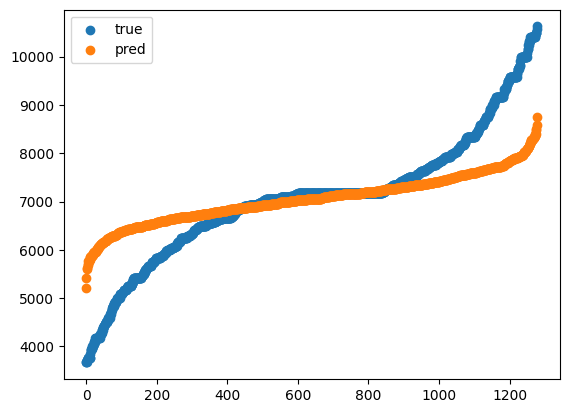

In [21]:
#Q3
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test), label='true')
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred), label = 'pred')
plt.legend()

In [22]:
ridge.coef_

array([ 199.17983575,   31.94839626,  200.67263405,  216.01833841,
         63.96786161,   82.44151746,  211.13649537,    0.        ,
       1104.71863579,  848.98674539,  712.99204893,  530.81405624,
        912.12696016,  811.05621833,   62.85549743,  478.22103195,
        345.59622559,    0.        ,  349.06893612,  -46.17516078,
        195.49569385,  170.6383442 , -301.90500252, -198.58589325])

883.9633880561694 1259.0154409614265


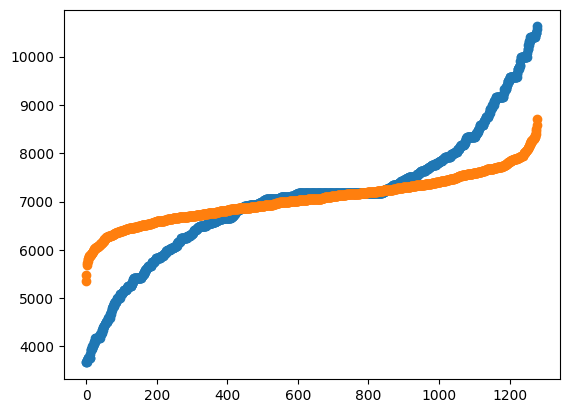

In [23]:
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test))
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred))

In [24]:
lasso.coef_

array([ 199.1098392 ,   32.77773036,  198.7984487 ,  216.55834012,
         63.78178972,   57.86020335,   16.71046797,    0.        ,
       1010.05193435,  760.43319774,  449.0518608 ,  442.23616884,
        811.08279423,  711.69897759,   -0.        ,    0.        ,
          0.        ,    0.        ,  328.78286832,   -0.        ,
        173.32167607,  119.47952843, -260.33119853, -187.52057765])

In [25]:
# train Decision Tree regression model
decisiontree = DecisionTreeRegressor(max_depth = 10, min_samples_split = 5)
decisiontree.fit(X_train, y_train)

#evaluating train error
mean_absolute_error(y_train,decisiontree.predict(X_train))

603.7265103327798

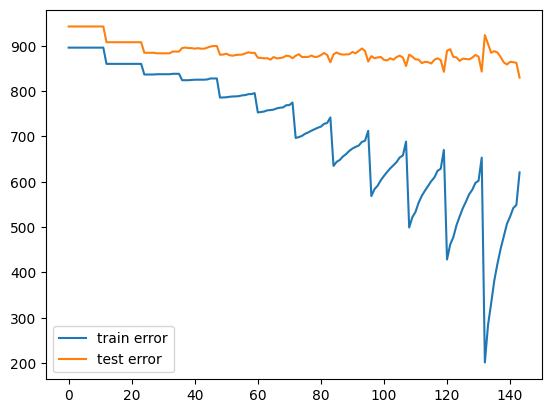

In [33]:
max_depth_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20]
min_samples_split_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20]
train_error = []
test_error = []

for md in max_depth_list:
    for ml in min_samples_split_list:
        decisiontree = DecisionTreeRegressor(max_depth=md, min_samples_split=ml)
        decisiontree.fit(X_train, y_train)
        train_error.append(mean_absolute_error(y_train, decisiontree.predict(X_train)))
        test_error.append(mean_absolute_error(y_test, decisiontree.predict(X_test)))

plt.plot(range(len(max_depth_list) * len(min_samples_split_list)), train_error, label='train error')
plt.plot(range(len(max_depth_list) * len(min_samples_split_list)), test_error, label='test error')
plt.legend()

In [30]:
print("Test Errors:")
for depth, error in zip(max_depth_list, test_error):
    print(f"Max Depth: {depth}, Test Error: {error}")

Test Errors:
Max Depth: 10, Test Error: 794.346882278756
Max Depth: 11, Test Error: 791.8136919026131
Max Depth: 12, Test Error: 799.1530363752078
Max Depth: 13, Test Error: 795.719954405384
Max Depth: 14, Test Error: 792.8659170996508
Max Depth: 15, Test Error: 790.7844272349399
Max Depth: 16, Test Error: 785.7156051795771
Max Depth: 17, Test Error: 786.1539409116509
Max Depth: 18, Test Error: 788.1479409599101


In [27]:
# Fitting a Random Forest Regressor
randomf = RandomForestRegressor()
randomf.fit(X_train, y_train)
mean_absolute_error(y_train,randomf.predict(X_train))

383.15091230931694

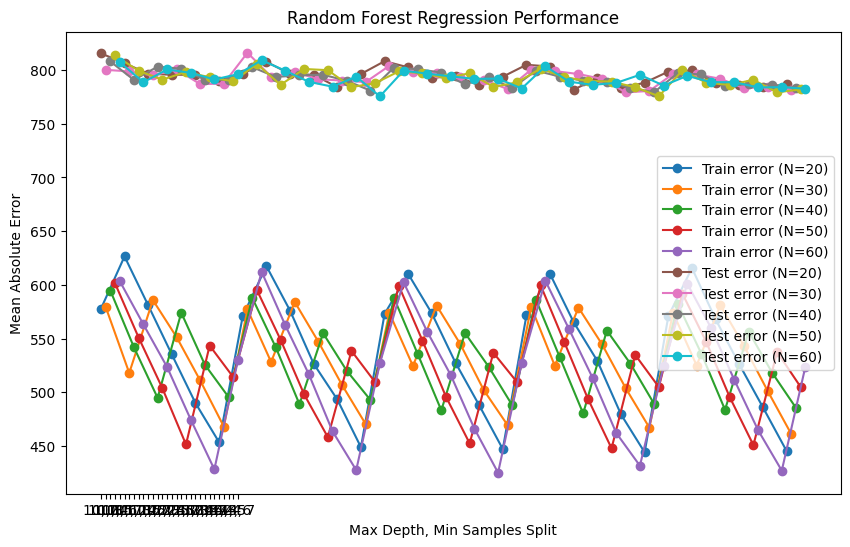

In [36]:
max_depth_list = [10,11,12,13,14]
min_samples_split_list = [2, 3, 4, 5, 6, 7]
train_error = []
test_error =[]
N_estimator=[20,30,40,50,60]
for n in N_estimator:
    for mdl in max_depth_list:
        for mssl in min_samples_split_list:
            decisiontree = RandomForestRegressor(n_estimators=n, max_depth = mdl, min_samples_split = mssl)
            decisiontree.fit(X_train, y_train)
            train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
            test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.figure(figsize=(10, 6))

# Plotting train errors
for i in range(len(N_estimator)):
    plt.plot(range(i, len(train_error), len(N_estimator)), train_error[i::len(N_estimator)], marker='o', label=f'Train error (N={N_estimator[i]})')

# Plotting test errors
for i in range(len(N_estimator)):
    plt.plot(range(i, len(test_error), len(N_estimator)), test_error[i::len(N_estimator)], marker='o', label=f'Test error (N={N_estimator[i]})')

plt.xticks(range(len(max_depth_list) * len(min_samples_split_list)), [f"{mdl}, {mssl}" for mdl in max_depth_list for mssl in min_samples_split_list])
plt.xlabel('Max Depth, Min Samples Split')
plt.ylabel('Mean Absolute Error')
plt.title('Random Forest Regression Performance')
plt.legend()
plt.show()

In [37]:
pd.DataFrame({'feature':X_train.columns, "importance":randomf.feature_importances_*100}).sort_values(by='importance', ascending=False)

,feature,importance
0,job_years,25.612523
2,hours_per_week,16.298816
3,telecommute_days_per_week,9.337801
4,certifications,6.733793
23,is_education_computer_related_Yes,6.473443
1,is_manager,5.168789
9,job_title_DBA,4.555184
18,education_Bachelors (4 years),4.473210
11,job_title_Developer,3.648783
20,education_Masters,3.610232
